In [507]:
from __future__          import print_function
from urllib              import request
from collections         import Counter
from nltk                import word_tokenize, FreqDist
from yellowbrick.text    import DispersionPlot
from wordcloud           import WordCloud
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import random
import nltk
import matplotlib
import requests
import re

In [508]:
URL = 'http://www.gutenberg.org/cache/epub/24681/pg24681.txt'

RESPONSE = request.urlopen(URL)
RAW = RESPONSE.read().decode('utf8')

for char in '-.,\n;:?=)(/&%$§"!)12345678':
    RAW = RAW.replace(char, ' ')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
data = RAW
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)                   

# Generate a Wordcloud

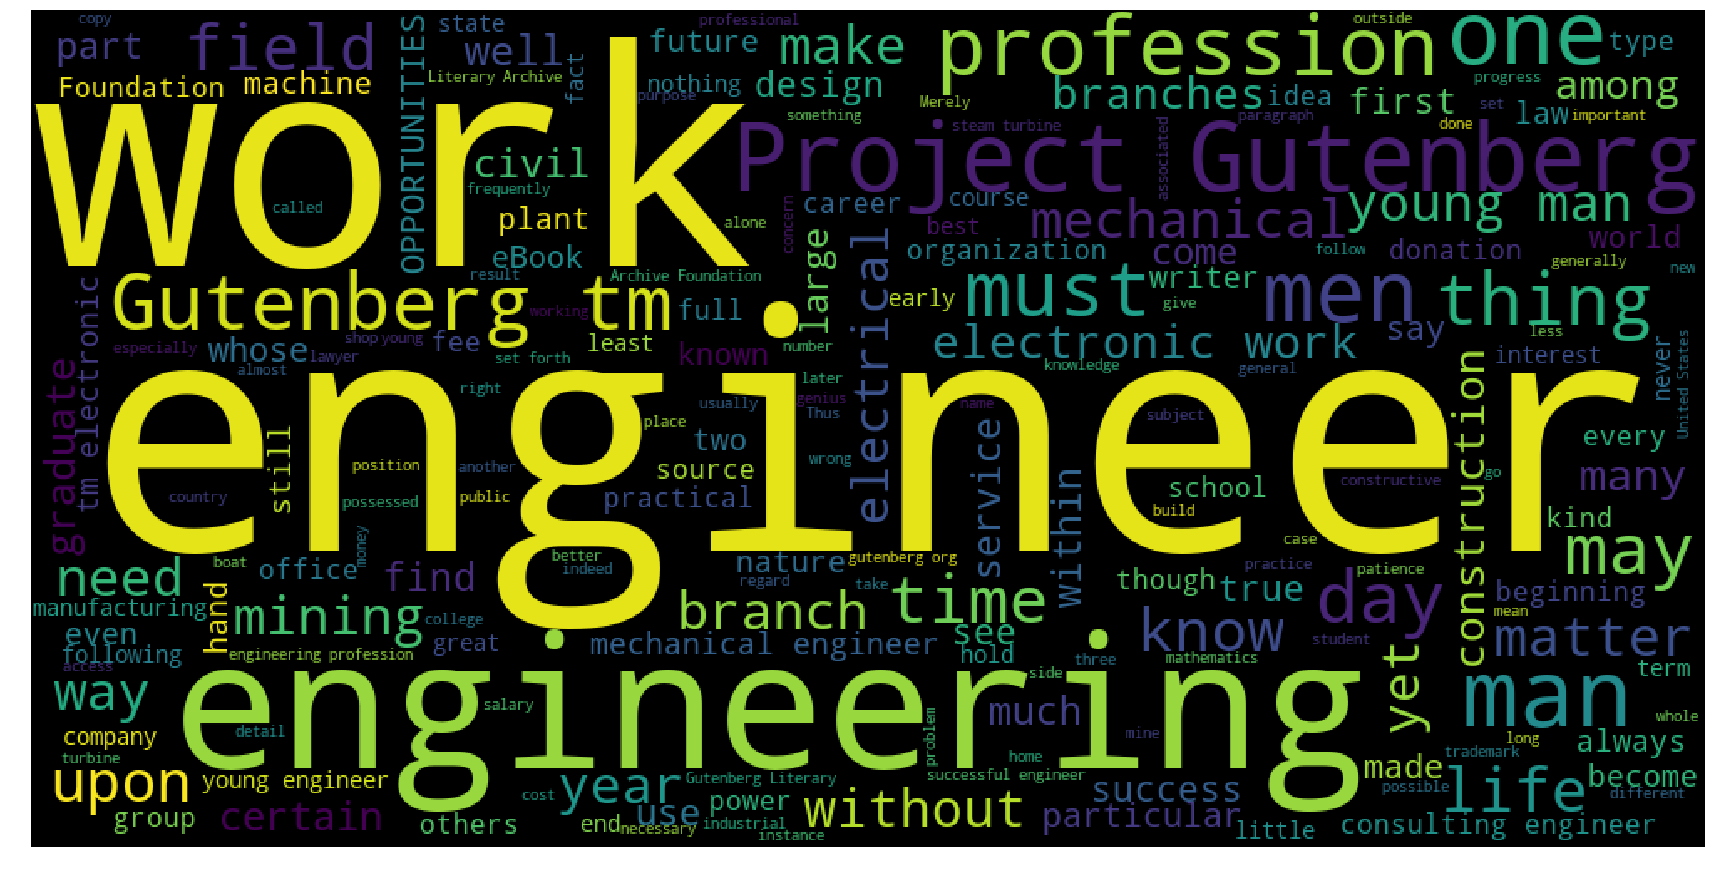

In [509]:
UNIQUE_STRING = (" ").join(wordsFiltered)
WORDCLOUD = WordCloud(width=1000, height=500).generate(UNIQUE_STRING)
plt.figure(figsize=(30, 16))
plt.imshow(WORDCLOUD)
plt.axis("off")
plt.show()

# Histogram

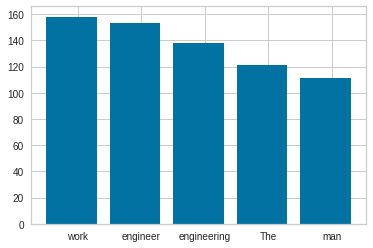

In [510]:
vocab_labels, vocab_values = zip(*Counter(wordsFiltered).items())  
                                                                                                                                                           
sorted_values = sorted(vocab_values)[::-1]
sorted_labels = [x for (y,x) in sorted(zip(vocab_values,vocab_labels))][::-1]  
indexes = np.arange(len(sorted_labels[:5]))                                    
width = 1                                                                                                                                                

plt.bar(indexes, sorted_values[:5])
plt.xticks(indexes + width * 0.1, sorted_labels[:5])                                                                                    
plt.show()

# Wordoccureny in sentences

In [511]:
text = nltk.Text(wordsFiltered)
text_choosen = text.concordance(random.choice(text))

Displaying 9 of 9 matches:
fully Philosophers time immemorial including Plato Emerson written still small 
ed nonproprietary proprietary form including word processing hypertext form How
m liability damages costs expenses including legal fees YOU AGREE THAT YOU HAVE
IES OF ANY KIND EXPRESS OR IMPLIED INCLUDING BUT NOT LIMITED TO WARRANTIES OF M
 harmless liability costs expenses including legal fees arise directly indirect
 readable widest variety computers including obsolete old middle aged new compu
 accessible widest array equipment including outdated equipment Many small dona
ses Donations accepted number ways including checks online payments credit card
s information Project Gutenberg tm including make donations Project Gutenberg L


# n-gram

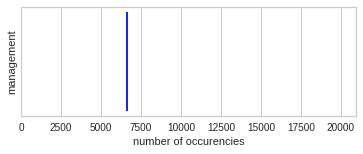

In [512]:
words = re.split("\W", RAW.lower()) 
words = [w for w in words if w != ""]
WORD = random.choice(wordsFiltered)

x=list()
for i in range(0,len(words)): 
    if words[i] == WORD:
        x.append(i)

fig, ax = plt.subplots()
ax.vlines(x, 0, 1, edgecolor="Blue")
ax.set_xlim([0, len(words)])
ax.set_xlabel('number of occurencies')
ax.set_xticks([0],minor=True)
ax.set_ylabel(WORD)
ax.set_yticks([])
fig.set_figheight(2)

# Line Graph

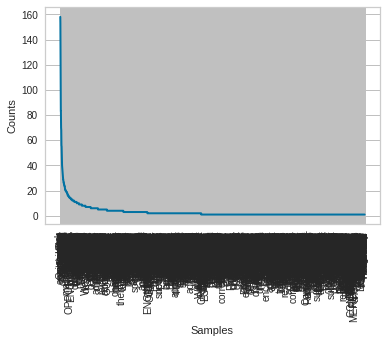

In [513]:
fdist = FreqDist(wordsFiltered)
fdist.plot()